# API 4: Initialization

Initialization is the first step to gaurantee good training. Each activation function is initialized to be $\phi(x)={\rm scale\_base}*b(x) + {\rm scale\_sp}*{\rm spline}(x)$.
1. $b(x)$ is the base function, default: 'silu', can be set with ${\rm base\_fun}$

2. scale_sp sample from N(0, noise_scale^2)

3. scale_base sampled from N(scale_base_mu, scale_base_sigma^2)

4. sparse initialization: if sparse_init = True, most scale_base and scale_sp will be set to zero


Default setup

cuda
checkpoint directory created: ./model
saving model version 0.0


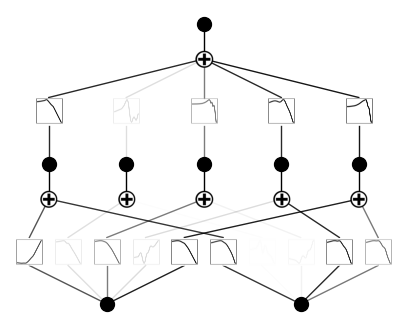

In [1]:
from kan import KAN, create_dataset
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = KAN(width=[2,5,1], grid=5, k=3, seed=0, device=device)
x = torch.normal(0,1,size=(100,2)).to(device)
model(x) # forward is needed to collect activations for plotting
model.plot()

Case 1: Initialize all activation functions to be exactly linear. We need to set noise_scale_base = 0., base_fun = identity, noise_scale = 0.

checkpoint directory created: ./model
saving model version 0.0


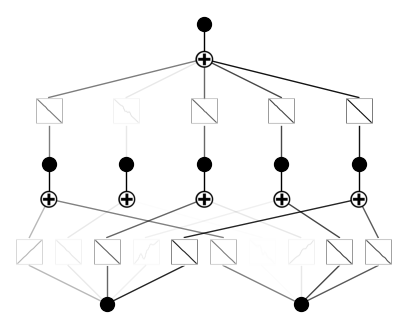

In [2]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, base_fun = 'identity', device=device)
x = torch.normal(0,1,size=(100,2)).to(device)
model(x) # forward is needed to collect activations for plotting
model.plot()

Case 2: Noisy spline initialization (not recommended, just for illustration). Set noise_scale to be a large number.

checkpoint directory created: ./model
saving model version 0.0


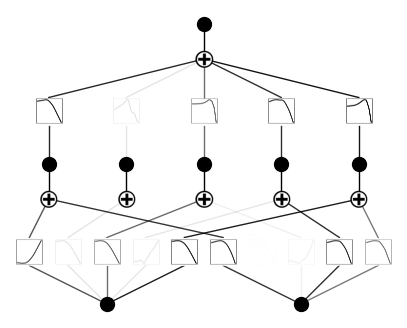

In [3]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, noise_scale=0.3, device=device)
x = torch.normal(0,1,size=(100,2)).to(device)
model(x) # forward is needed to collect activations for plotting
model.plot()

checkpoint directory created: ./model
saving model version 0.0


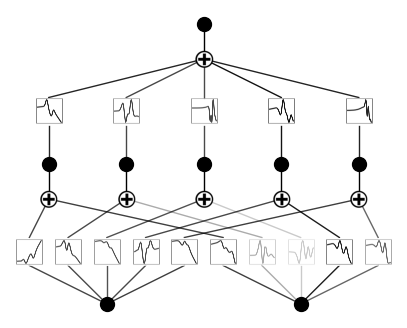

In [5]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, noise_scale=10., device=device)
x = torch.normal(0,1,size=(100,2)).to(device)
model(x) # forward is needed to collect activations for plotting
model.plot()

Case 3: scale_base_mu and scale_base_sigma

checkpoint directory created: ./model
saving model version 0.0


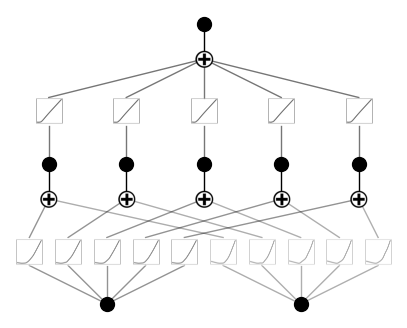

In [6]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, scale_base_mu=5, scale_base_sigma=0, device=device)
x = torch.normal(0,1,size=(100,2)).to(device)
model(x) # forward is needed to collect activations for plotting
model.plot()

checkpoint directory created: ./model
saving model version 0.0


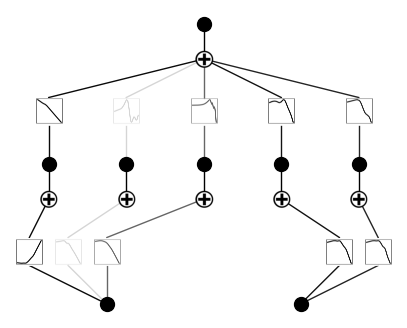

In [7]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, sparse_init=True, device=device)
x = torch.normal(0,1,size=(100,2)).to(device)
model(x) # forward is needed to collect activations for plotting
model.plot()